In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [9]:
test_df = pd.read_csv('/content/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('/content/BikeRentalDaily_train.csv', delimiter=';')

test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [13]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    int64  
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    int64  
 4   mnth             132 non-null    int64  
 5   holiday          132 non-null    int64  
 6   weekday          132 non-null    int64  
 7   workingday       132 non-null    int64  
 8   weathersit       132 non-null    int64  
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    int64  
 14  price reduction  132 non-null    int64  
 15  casual           132 non-null    int64  
 16  registered       132 non-null    int64  
 17  cnt             

In [15]:
test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [17]:
test_df['weekday']

0      3
1      1
2      6
3     -1
4      2
      ..
127    4
128    6
129   -1
130    3
131    0
Name: weekday, Length: 132, dtype: int64

In [31]:
test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

test_df['weekday']

0      2
1      0
2      1
3      2
4      1
      ..
127    6
128    0
129    4
130    5
131    6
Name: weekday, Length: 132, dtype: int64

In [42]:
test_df.sort_values('instant')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt,calculateMahalanobis
116,7.0,07.01.2011,1.0,0.0,1.0,0.0,4.0,1.0,2.0,7.8609,0.208839,74.80440,0.168726,977.0,0.0,148.0,1362.0,1510.0,NaN
62,11.0,11.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,2.0,6.7636,0.191464,102.95460,0.122132,1028.0,0.0,43.0,1220.0,1263.0,NaN
34,14.0,14.01.2011,1.0,0.0,1.0,0.0,4.0,1.0,1.0,6.4348,0.188413,80.67390,0.126548,481.0,0.0,54.0,1367.0,1421.0,NaN
73,16.0,16.01.2011,1.0,0.0,1.0,0.0,6.0,0.0,1.0,9.2667,0.234217,72.56250,0.188433,493.0,0.0,251.0,953.0,1204.0,NaN
45,18.0,18.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,2.0,8.6667,0.232333,129.25005,0.146775,989.0,0.0,9.0,674.0,683.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,709.0,09.12.2012,4.0,1.0,12.0,0.0,0.0,0.0,2.0,15.3667,0.390146,135.81255,0.157975,869.0,0.0,441.0,2787.0,3228.0,NaN
78,711.0,11.12.2012,4.0,1.0,12.0,0.0,2.0,1.0,2.0,14.1333,0.338363,89.50005,0.296037,711.0,0.0,282.0,5219.0,5501.0,NaN
101,714.0,14.12.2012,4.0,1.0,12.0,0.0,5.0,1.0,1.0,11.2667,0.294192,96.43755,0.131229,528.0,0.0,429.0,5182.0,5611.0,NaN
67,718.0,18.12.2012,4.0,1.0,12.0,0.0,2.0,1.0,1.0,16.4333,0.409708,99.93750,0.221404,759.0,0.0,433.0,5124.0,5557.0,NaN


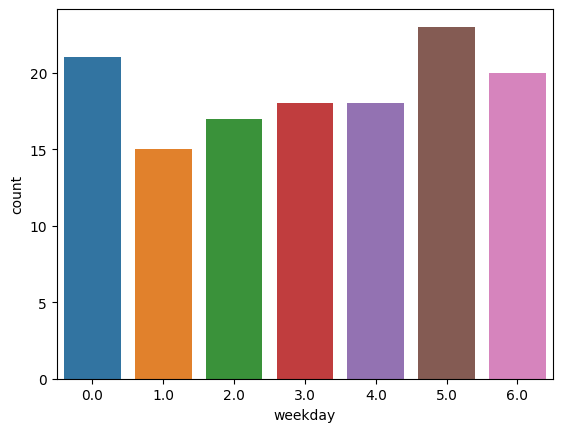

In [43]:
sns.countplot(x='weekday', data=test_df)
plt.show()

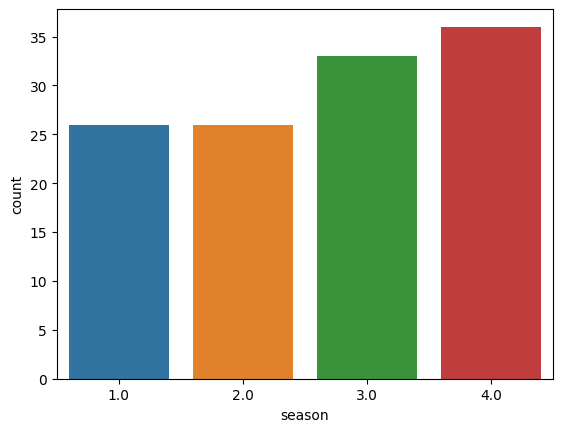

In [44]:
sns.countplot(x='season', data=test_df)
plt.show()

In [34]:
test_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt,calculateMahalanobis
count,132.000000,121.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,126.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000,0.0
mean,378.598485,2.652893,0.515152,6.750000,0.022727,3.106061,0.704545,1.371212,19.844301,0.477679,93.645418,0.185349,749.55303,0.166667,999.825758,3755.166667,4754.992424,NaN
std,221.672024,1.123319,0.501674,3.497818,0.149600,2.057411,0.457985,0.558150,7.827241,0.173988,21.467624,0.068409,178.50004,0.374098,2313.057147,1651.661972,3118.721529,NaN
min,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.895700,0.117930,0.000000,0.042304,458.00000,0.000000,9.000000,416.000000,431.000000,NaN
25%,195.500000,2.000000,0.000000,3.750000,0.000000,1.000000,0.000000,1.000000,13.300000,0.325754,80.692913,0.135898,583.50000,0.000000,330.750000,2532.750000,3289.500000,NaN
50%,387.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.200000,0.470002,93.468750,0.179102,745.00000,0.000000,693.500000,3705.000000,4621.000000,NaN
75%,579.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.366675,0.635919,107.484413,0.227141,918.00000,0.000000,1138.500000,5112.000000,6145.250000,NaN
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.933300,0.840896,139.500000,0.385571,1028.00000,1.000000,26506.000000,6803.000000,32472.000000,NaN


In [35]:
test_df = test_df.astype({'instant': 'float', 'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float', 'weathersit':'float', 'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant               132 non-null    float64
 1   dteday                132 non-null    object 
 2   season                121 non-null    float64
 3   yr                    132 non-null    float64
 4   mnth                  132 non-null    float64
 5   holiday               132 non-null    float64
 6   weekday               132 non-null    float64
 7   workingday            132 non-null    float64
 8   weathersit            132 non-null    float64
 9   temp                  132 non-null    float64
 10  atemp                 132 non-null    float64
 11  hum                   126 non-null    float64
 12  windspeed             132 non-null    float64
 13  leaflets              132 non-null    float64
 14  price reduction       132 non-null    float64
 15  casual                1

In [47]:
#filter the df based on the quanntile (still have to figure out, which quantile percentage is the right one)
q = test_df["casual"].quantile(0.9)
#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = test_df[test_df['casual'] < q]

1595.9000000000003


In [48]:
#fixing every
for i in handeled_df['windspeed']:
    if i < 0:
        handeled_df['windspeed'] = handeled_df['windspeed'].replace(i, 0)

for i in handeled_df['hum']:
    if i > 100:
        handeled_df['hum'] = handeled_df['hum'].replace(i, 100)


handeled_df[['windspeed', 'hum']].describe()


#handeled_df['windspeed'] = handeled_df['windspeed'].drop(handeled_df[handeled_df['windspeed'] < 0].index)
#handeled_df.describe()

<ipython-input-48-e695f87f4ff1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handeled_df['hum'] = handeled_df['hum'].replace(i, 100)


,windspeed,hum
count,118.000000,112.000000
mean,0.183977,88.262942
std,0.069073,15.551185
min,0.042304,0.000000
25%,0.136363,80.630437
50%,0.175067,94.125000
75%,0.223263,100.000000
max,0.385571,100.000000


In [49]:
test_df['hum']

0      108.06255
1       75.65220
2       81.81255
3            NaN
4      105.25005
         ...    
127     92.31255
128     90.18750
129    127.31250
130     74.68755
131    119.43750
Name: hum, Length: 132, dtype: float64

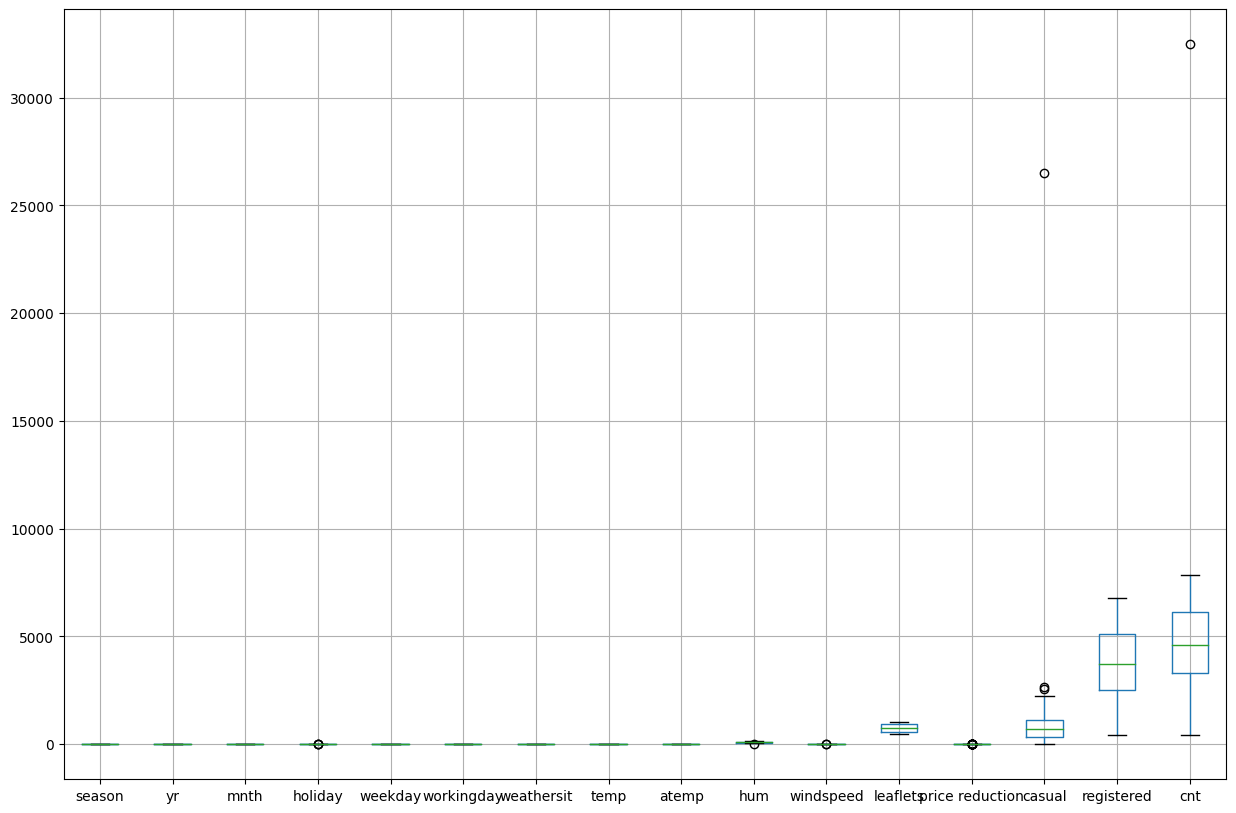

In [50]:
boxplot = test_df.iloc[:, 1:-1].boxplot(figsize=(15, 10))
plt.show()

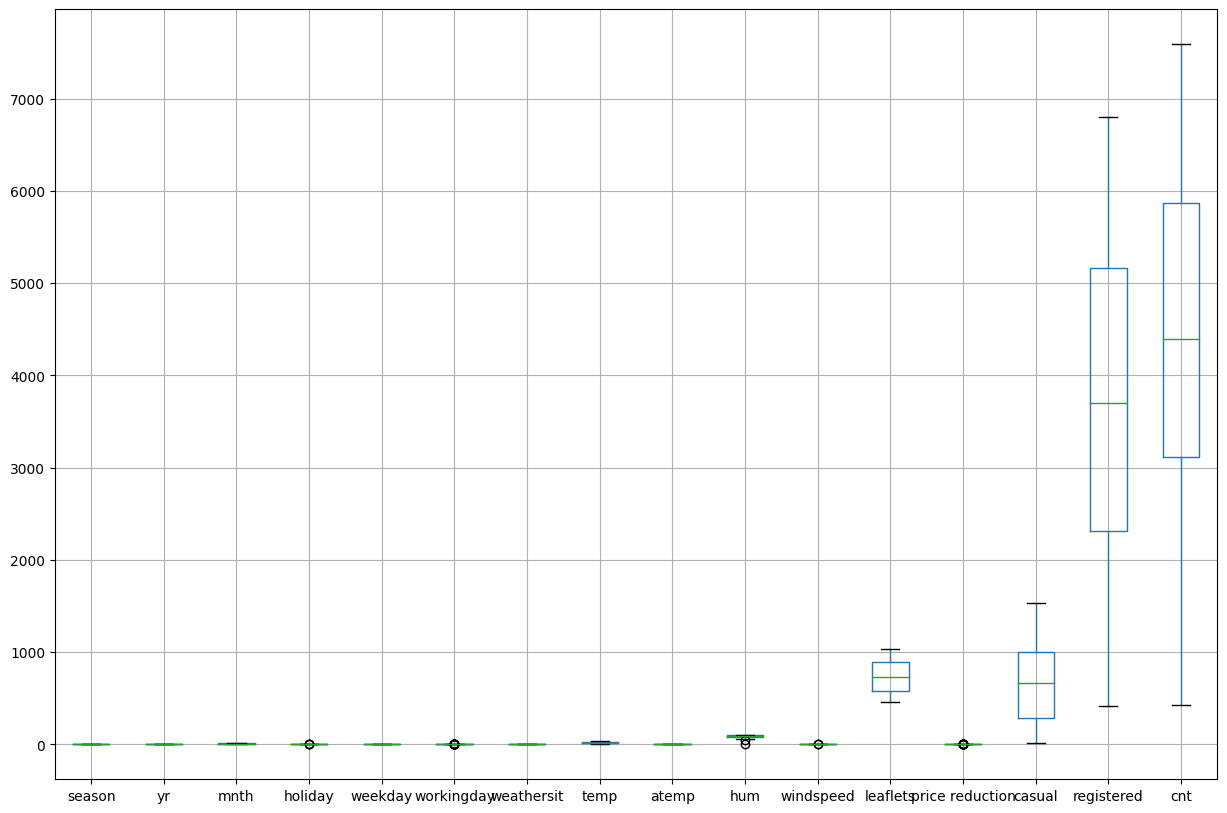

In [51]:
boxplot = handeled_df.iloc[:, 1:-1].boxplot(figsize=(15, 10))
plt.show()

In [52]:
handeled_df[['holiday', 'workingday', 'hum', 'windspeed', 'price reduction']].describe()

,holiday,workingday,hum,windspeed,price reduction
count,118.000000,118.000000,112.000000,118.000000,118.000000
mean,0.025424,0.779661,88.262942,0.183977,0.177966
std,0.158080,0.416243,15.551185,0.069073,0.384115
min,0.000000,0.000000,0.000000,0.042304,0.000000
25%,0.000000,1.000000,80.630437,0.136363,0.000000
50%,0.000000,1.000000,94.125000,0.175067,0.000000
75%,0.000000,1.000000,100.000000,0.223263,0.000000
max,1.000000,1.000000,100.000000,0.385571,1.000000
